# LPBF Cube Printing Experiment Overview

### Objective

The primary goal of this experiment is to delve into the Laser Powder Bed Fusion (LPBF) process by focusing on how variations in laser power and scan speed affect melting regimes. It seeks to understand the influence of these parameters on the properties of printed cubes and to identify transitions between different melting regimes.

### Methodology

- **Printing:** The experiment involved printing nine cubes using an LPBF machine, with each cube subjected to different sets of processing parameters to explore various aspects of the LPBF process.
- **Optical Data Collection:** Optical data, including on-axis emissions and off-axis reflections from the process zone, were collected for each cube. This data aims to study the impact of processing parameters on the optical signals emitted during the printing process.
- **Parameter Variation:** The experiment varied parameters every 10 lines within each cube, resulting in 10 unique parameter sets per cube. This approach allowed for a comprehensive investigation into the effects of laser power and scan speed variations.
- **Data Documentation:** Data files for each 10-line segment were meticulously recorded, documenting the specific parameter set used, to facilitate a detailed analysis.

### Parameter Ranges

- **Laser Power:** The laser power was varied between 90W and 120W, aiming to explore a wide spectrum of processing conditions.
- **Scan Speed:** The scan speed ranged from 300 mm/s to 1800 mm/s, providing a detailed perspective on its impact on the printing process.

### Details of the Cubes

#### Cube 1 & 9: Consistency and Reproducibility Check

- **Description:** Cubes 1 and 9, identical in their parameter settings, were printed to evaluate the consistency and reproducibility of the LPBF process across different positions within the setup.
- **Processing Parameters:** As control samples, these cubes offer a baseline for comparing print outcomes under identical conditions across different experimental runs.

#### Pairs Cube 1 & 2, Cube 3 & 4, and Cube 5 & 6: Study of Different Locations on Optical Signals

- **Description:** These cube pairs were specifically designed to assess the effect of different locations within the LPBF machine on the optical signals captured during the printing process. Although each pair shares identical parameter sets, the arrangement of these parameters differs to study how spatial positioning affects the quality of optical data collected.
- **Objective:** The focus is on understanding how variations in cube placement within the printer influence the characteristics of optical signals, potentially affecting the interpretation of melting regimes and the quality of the final print.

#### Cube 7 & 8: Focused Speed Variation Analysis

- **Description:** Cubes 7 and 8 concentrate on examining the effects of scan speed variations at a constant laser power of 105W. This part of the experiment aims to isolate the speed's impact from power variations, offering insights into how scan speed alone influences the melting regimes.
- **Details:** These cubes provide a granular view into the role of scan speed in the LPBF process, independent of laser power changes, and its effects on the outcomes.

### Conclusion

This experiment was carefully crafted to unravel the intricacies of the LPBF process, shedding light on the significant role of laser processing parameters in determining print quality and efficiency. By methodically varying laser power and scan speed and examining their effects on optical signals, the study significantly advances the understanding of LPBF. It lays the groundwork for developing optimized printing strategies that enhance material properties and reliability of the process.

In [1]:
import pandas as pd

# Load the Excel file
excel_path = './experiment_parameters.xlsx'
xl = pd.ExcelFile(excel_path)

# List all the sheet names to see the cubes
sheet_names = xl.sheet_names
sheet_names


['Cube1',
 'Cube2',
 'Cube3',
 'Cube4',
 'Cube5',
 'Cube6',
 'Cube7',
 'Cube8',
 'Cube9']

In [2]:
# Load all sheets into a dictionary of dataframes
cubes_data = {sheet: xl.parse(sheet) for sheet in sheet_names}

# Inspect the first few rows of each sheet to understand the structure and content
for cube, data in cubes_data.items():
    print(f"{cube}:")
    print(data.head(), "\n")


Cube1:
   Speed (mm/s)  Power (W)  Power perc (%)  #
0          1050         90              18  1
1           800         90              18  2
2          1800        120              24  3
3          1300        120              24  4
4           550        120              24  5 

Cube2:
   Speed (mm/s)  Power (W)  Power perc (%)   #
0           800        105              21  11
1           300        120              24  12
2          1300        105              21  13
3          1050        120              24  14
4           300        105              21  15 

Cube3:
   Speed (mm/s)  Power (W)  Power perc (%)  #
0          1550         90              18  1
1          1300        120              24  2
2          1050         90              18  3
3           300        120              24  4
4           550        120              24  5 

Cube4:
   Speed (mm/s)  Power (W)  Power perc (%)   #
0           800        105              21  11
1           800        120            

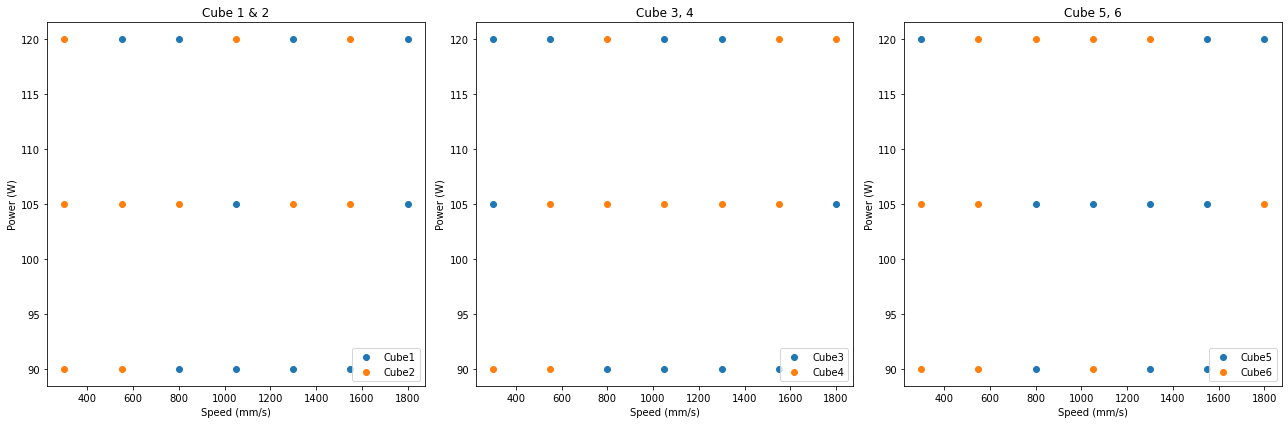

In [3]:
import matplotlib.pyplot as plt

# Define pairs of cubes to be considered together
cube_pairs = {
    'Cube 1 & 2': ['Cube1', 'Cube2'],
    'Cube 3, 4': ['Cube3', 'Cube4'],
    'Cube 5, 6': ['Cube5', 'Cube6']
}

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(cube_pairs), figsize=(18, 6))

for ax, (title, cubes) in zip(axes, cube_pairs.items()):
    for cube in cubes:
        data = cubes_data[cube]
        ax.scatter(data['Speed (mm/s)'], data['Power (W)'], label=cube)
    ax.set_title(title)
    ax.set_xlabel('Speed (mm/s)')
    ax.set_ylabel('Power (W)')
    ax.legend()

plt.tight_layout()
plt.show()


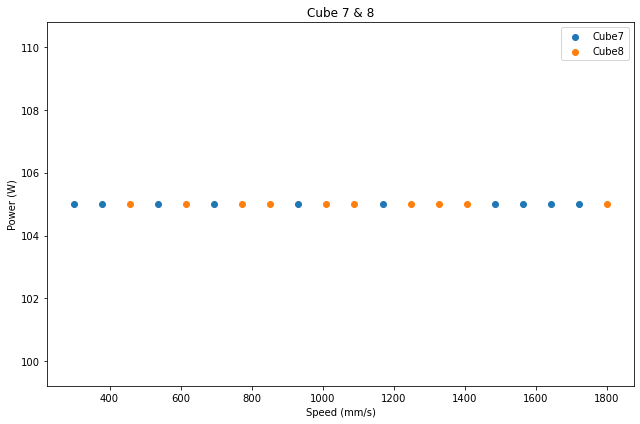

In [4]:
# Adjusting the cube_pairs dictionary to focus on Cube 7 and Cube 8
cube_pairs_for_analysis = {
    'Cube 7 & 8': ['Cube7', 'Cube8']
}

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

for title, cubes in cube_pairs_for_analysis.items():
    for cube in cubes:
        data = cubes_data[cube]
        ax.scatter(data['Speed (mm/s)'], data['Power (W)'], label=cube)
    ax.set_title(title)
    ax.set_xlabel('Speed (mm/s)')
    ax.set_ylabel('Power (W)')
    ax.legend()

plt.tight_layout()
plt.show()
